In [1]:
### Correlation with Memory Examples - ATOC7500 Lecture #5
### coded by Prof. Libby Barnes (CSU) with additional updates/coding by Jennifer Kay (CU)
### last updated September 16, 2020
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
## needed in ipython notebooks to make plots appear in-line

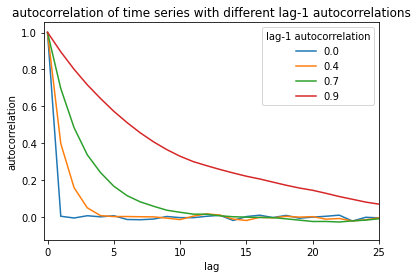

In [2]:
#Calculate the autocorrelation of time series with differing lag-1 autocorrelations
t = np.arange(0,10000,1)
auto_vec = np.array([0, .4, .7, .9])
for ia,a in enumerate(auto_vec):
    x1 = np.empty((np.size(t),))
    b = np.sqrt(1. - a**2)
    x1[0] = np.random.normal(0.,1.,size=1)    
    for it,tval in enumerate(t[1:]):
        x1[it+1] = a*x1[it] + b*np.random.normal(size=1)
    c = np.correlate(x1,x1,'same')/(np.var(x1)*np.size(x1))
    c = c[int(np.size(c)/2):]
    plt.plot(np.arange(0,np.size(c)),c,'-')
    plt.xlim(-.25,25)
plt.xlabel('lag');
plt.ylabel('autocorrelation');    
plt.legend(np.ndarray.tolist(auto_vec), title = 'lag-1 autocorrelation');
plt.title('autocorrelation of time series with different lag-1 autocorrelations', fontsize = 12);

In [3]:
## Calculate histograms of correlations as a function of time series memory
t = np.arange(0,1000,1)
auto_vec = np.array([0, .4, .7, .9])
CORR_VEC = np.empty((1000,np.size(auto_vec)))

for ia,a in enumerate(auto_vec):
    b = np.sqrt(1. - a**2)    
    x = np.empty((np.size(t),))
    y = np.empty((np.size(t),))    
    
    for ic,cval in enumerate(CORR_VEC[:,0]):
        x[0] = np.random.normal(size=1)
        y[0] = np.random.normal(size=1)        
        for it,tval in enumerate(t[1:]):
            x[it+1] = a*x[it] + b*np.random.normal(size=1)
            y[it+1] = a*y[it] + b*np.random.normal(size=1)           
        c = np.corrcoef(x,y)
        CORR_VEC[ic,ia] = c[0,1]
        c = np.correlate(x1,x1, 'same')/(np.var(x1)*np.size(x1))
        c = c[int(np.size(c)/2):]

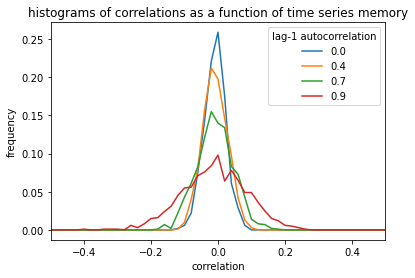

In [4]:
## plot results
xinc = np.arange(-1.,1.,0.02)
iplot = 0
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-')
iplot = 1
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-')
iplot = 2
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-')
iplot = 3
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-')
   
plt.xlabel('correlation')
plt.ylabel('frequency')    
plt.legend(np.ndarray.tolist(auto_vec), title = 'lag-1 autocorrelation');
plt.title('histograms of correlations as a function of time series memory', fontsize = 12);
plt.xlim(-.5,.5);